In [1]:
# !nvidia-smi

In [2]:
import numpy as np

In [3]:
import json
with open("../data/class_list.json") as f:
    class_colors_mapping_hex = json.load(f)

In [4]:
from PIL import ImageColor
class_colors_mapping_rgb = {}
for color, label in class_colors_mapping_hex.items():
    class_colors_mapping_rgb[label] = ImageColor.getcolor(color, "RGB")

In [5]:
num_classes = len(class_colors_mapping_rgb.keys())

In [6]:
num_classes

55

In [7]:
import tensorflow as tf

# Define the U-Net model architecture
def unet_model(input_shape, num_classes):
    """model: https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/"""
    
    inputs = tf.keras.layers.Input(shape=input_shape)
    print(inputs.shape)

    inputs_padded = tf.keras.layers.ZeroPadding2D(((0,105), (0,16)))( inputs )
    print(inputs_padded.shape)

    
    # Encoder
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(inputs_padded)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(conv1)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    print(pool1.shape)
    
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(pool1)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(conv2)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    print(pool2.shape)

    
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(pool2)
    conv3 = tf.keras.layers.BatchNormalization()(conv3)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(conv3)
    conv3 = tf.keras.layers.BatchNormalization()(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    print(pool3.shape)
    
    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(pool3)
    conv4 = tf.keras.layers.BatchNormalization()(conv4)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(conv4)
    conv4 = tf.keras.layers.BatchNormalization()(conv4)
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)
    print(pool4.shape)


    # lowest layer
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(pool4)
    conv5 = tf.keras.layers.BatchNormalization()(conv5)
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(conv5)
    conv5 = tf.keras.layers.BatchNormalization()(conv5)
    drop5 = tf.keras.layers.Dropout(0.5)(conv5)


    # Decoder
    up1 = tf.keras.layers.Conv2DTranspose(512, 2, strides=(2, 2), padding='same', kernel_initializer = 'he_normal')(drop5)
    merge1 = tf.keras.layers.concatenate([conv4, up1], axis=3)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(merge1)
    conv6 = tf.keras.layers.BatchNormalization()(conv6)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(conv6)
    conv6 = tf.keras.layers.BatchNormalization()(conv6)
    print("conv6", conv6.shape)

    
    up2 = tf.keras.layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same', kernel_initializer = 'he_normal')(conv6)
    merge2 = tf.keras.layers.concatenate([conv3, up2], axis=3)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(merge2)
    conv7 = tf.keras.layers.BatchNormalization()(conv7)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(conv7)
    conv7 = tf.keras.layers.BatchNormalization()(conv7)
    print("conv7",conv7.shape)

    
    up3 = tf.keras.layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same', kernel_initializer = 'he_normal')(conv7)
    merge3 = tf.keras.layers.concatenate([conv2, up3], axis=3)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(merge3)
    conv8 = tf.keras.layers.BatchNormalization()(conv8)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(conv8)
    conv8 = tf.keras.layers.BatchNormalization()(conv8)

    print("conv8",conv8.shape)

    
    up4 = tf.keras.layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same', kernel_initializer = 'he_normal')(conv8)
    merge4 = tf.keras.layers.concatenate([conv1, up4], axis=3)
    
    conv9 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(merge4)
    conv9 = tf.keras.layers.BatchNormalization()(conv9)
    conv9 = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(conv9)
    conv9 = tf.keras.layers.BatchNormalization()(conv9)
    conv9 = tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same', kernel_initializer = 'he_normal')(conv9)
    conv9 = tf.keras.layers.BatchNormalization()(conv9)

    print("conv9",conv9.shape)


    # Output
    outputs = tf.keras.layers.Conv2D(num_classes, 1, activation='sigmoid')(conv9)
    print(outputs.shape)

    outputs_unpadded = tf.keras.layers.Cropping2D(cropping=((0, 105), (0, 16)))(outputs) # todo check if legit
    print(outputs_unpadded.shape)

    
    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs_unpadded)
    
    return model

2023-04-23 12:41:36.869032: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
my_model = unet_model(input_shape=(151, 240, 3), num_classes=num_classes)

(None, 151, 240, 3)
(None, 256, 256, 3)
(None, 128, 128, 64)
(None, 64, 64, 128)


2023-04-23 12:41:42.900693: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(None, 32, 32, 256)
(None, 16, 16, 512)
conv6 (None, 32, 32, 512)
conv7 (None, 64, 64, 256)
conv8 (None, 128, 128, 128)
conv9 (None, 256, 256, 16)
(None, 256, 256, 55)
(None, 151, 240, 55)


In [9]:
my_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 151, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 256, 256, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

                                                                                                  
 batch_normalization_10 (BatchN  (None, 32, 32, 512)  2048       ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_11 (Conv2D)             (None, 32, 32, 512)  2359808     ['batch_normalization_10[0][0]'] 
                                                                                                  
 batch_normalization_11 (BatchN  (None, 32, 32, 512)  2048       ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_transpose_1 (Conv2DTran  (None, 64, 64, 256)  524544     ['batch_normalization_11[0][0]'] 
 spose)   

In [10]:
import os
import tarfile
from PIL import Image
import numpy

def read_data(tar_file: str):
    """
    Reads all images from a single scene in the A2D2 dataset.

    Parameters:
    scene_dir (str): Path to the directory containing the tar file for the scene.

    Returns:
    A list of PIL Image objects, each corresponding to an image in the scene.
    """

    # Open the tar file and read the images
    images = []
    with tarfile.open(tar_file) as tf:
        for member in tf.getmembers():
            if member.isfile() and member.name.endswith('.png'):
                f = tf.extractfile(member)
                image = np.array(Image.open(f))
                images.append(image)

    return images

In [11]:
image = numpy.array(Image.open("../data/sample_data/20180807145028_camera_frontcenter_000006882.png").resize((240, 151)))
label = numpy.array(Image.open("../data/sample_data/20180807145028_label_frontcenter_000006882.png").resize((240, 151)))

In [12]:
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

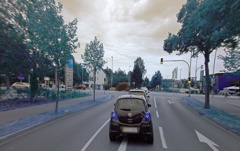

In [13]:
imshow(image)

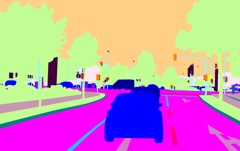

In [14]:
imshow(label) # true_multilabel

In [15]:
my_model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

In [16]:
mask = np.zeros(label.shape, dtype=np.uint8)
for idx, color in enumerate(class_colors_mapping_rgb.values()):
    mask[np.all(label == color, axis=-1)] = idx+1
mask = mask[:, :, 0]
masks = np.expand_dims(mask, axis=0)
masks = np.expand_dims(masks, axis=3)

In [17]:
from tensorflow.keras.utils import to_categorical
cat = to_categorical(masks, num_classes=num_classes)
cat.shape

(1, 151, 240, 55)

In [18]:
my_model.fit(x=numpy.expand_dims(image, axis=0), y=cat, epochs=15, steps_per_epoch=1, verbose=2)

Epoch 1/15
1/1 - 8s - loss: 4.0416 - accuracy: 0.0254 - 8s/epoch - 8s/step
Epoch 2/15
1/1 - 3s - loss: 3.7523 - accuracy: 0.2390 - 3s/epoch - 3s/step
Epoch 3/15
1/1 - 3s - loss: 3.6338 - accuracy: 0.4054 - 3s/epoch - 3s/step
Epoch 4/15
1/1 - 2s - loss: 3.5678 - accuracy: 0.5000 - 2s/epoch - 2s/step
Epoch 5/15
1/1 - 2s - loss: 3.5346 - accuracy: 0.5316 - 2s/epoch - 2s/step
Epoch 6/15
1/1 - 2s - loss: 3.5015 - accuracy: 0.5689 - 2s/epoch - 2s/step
Epoch 7/15
1/1 - 3s - loss: 3.4782 - accuracy: 0.6014 - 3s/epoch - 3s/step
Epoch 8/15
1/1 - 2s - loss: 3.4606 - accuracy: 0.6077 - 2s/epoch - 2s/step
Epoch 9/15
1/1 - 2s - loss: 3.4482 - accuracy: 0.6372 - 2s/epoch - 2s/step
Epoch 10/15
1/1 - 2s - loss: 3.4156 - accuracy: 0.6781 - 2s/epoch - 2s/step
Epoch 11/15
1/1 - 2s - loss: 3.4025 - accuracy: 0.6876 - 2s/epoch - 2s/step
Epoch 12/15
1/1 - 2s - loss: 3.3955 - accuracy: 0.6920 - 2s/epoch - 2s/step
Epoch 13/15
1/1 - 2s - loss: 3.3864 - accuracy: 0.6795 - 2s/epoch - 2s/step
Epoch 14/15
1/1 - 2s 

In [19]:
predicted = my_model.predict(numpy.expand_dims(image, axis=0))
predictions = np.squeeze(predicted)
predictions = np.argmax(predictions, axis=2)

1/1 [==============================] - 1s 949ms/step


In [20]:
colormap = {idx+1: color for idx, color in enumerate(class_colors_mapping_rgb.values())}
colormap[0]= (255,255,255)

In [21]:
def masks_to_image(predicted_masks, num_classes, colormap):
    r = np.zeros_like(predicted_masks).astype(np.uint8)
    g = np.zeros_like(predicted_masks).astype(np.uint8)
    b = np.zeros_like(predicted_masks).astype(np.uint8)
    for l in range(0, num_classes):
        idx = mask == l
        r[idx] = colormap[l][0]
        g[idx] = colormap[l][1]
        b[idx] = colormap[l][2]
    rgb = np.stack([r, g, b], axis=2)
    return rgb

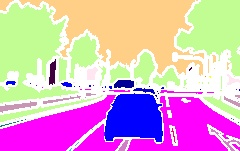

In [22]:
predicted_image = masks_to_image(predictions, num_classes, colormap)
imshow(predicted_image)

In [23]:
predictions.shape

(151, 240)